<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import git
import re

from pathlib import Path

# Jupyter magic to display plots inline
%matplotlib inline

In [2]:
# Read in the data
repo_root = Path(git.Repo(os.getcwd(), search_parent_directories=True).git.rev_parse("--show-toplevel"))
file_name = 'percent-bachelors-degrees-women-usa.csv'
file_path = f'{repo_root}/data/{file_name}'
gender_gaps = pd.read_csv(file_path)

# Quick exploration of the data
display(gender_gaps.shape)
display(gender_gaps.columns)
display(gender_gaps.info())
display(gender_gaps.isnull().sum())
display(gender_gaps.head())
display(gender_gaps.describe())

(42, 18)

Index(['Year', 'Agriculture', 'Architecture', 'Art and Performance', 'Biology',
       'Business', 'Communications and Journalism', 'Computer Science',
       'Education', 'Engineering', 'English', 'Foreign Languages',
       'Health Professions', 'Math and Statistics', 'Physical Sciences',
       'Psychology', 'Public Administration', 'Social Sciences and History'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 18 columns):
Year                             42 non-null int64
Agriculture                      42 non-null float64
Architecture                     42 non-null float64
Art and Performance              42 non-null float64
Biology                          42 non-null float64
Business                         42 non-null float64
Communications and Journalism    42 non-null float64
Computer Science                 42 non-null float64
Education                        42 non-null float64
Engineering                      42 non-null float64
English                          42 non-null float64
Foreign Languages                42 non-null float64
Health Professions               42 non-null float64
Math and Statistics              42 non-null float64
Physical Sciences                42 non-null float64
Psychology                       42 non-null float64
Public Administration            42 non-null float6

None

Year                             0
Agriculture                      0
Architecture                     0
Art and Performance              0
Biology                          0
Business                         0
Communications and Journalism    0
Computer Science                 0
Education                        0
Engineering                      0
English                          0
Foreign Languages                0
Health Professions               0
Math and Statistics              0
Physical Sciences                0
Psychology                       0
Public Administration            0
Social Sciences and History      0
dtype: int64

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,1990.500000,33.848165,33.685540,61.100000,49.429864,40.653471,56.216667,25.809524,76.356236,12.892857,66.186680,71.723810,82.983333,44.478571,31.304762,68.776190,76.085714,45.407143
std,12.267844,12.552731,9.574057,1.305336,10.087725,13.116109,8.698610,6.688753,2.212641,5.670824,1.950990,1.926682,2.914967,2.646262,9.000866,9.705463,5.879504,4.763653
min,1970.000000,4.229798,11.921005,58.600000,29.088363,9.064439,35.300000,13.600000,72.166525,0.800000,61.647206,69.000000,75.500000,38.000000,13.800000,44.400000,62.600000,36.100000
25%,1980.250000,30.840814,28.520709,60.200000,44.311821,37.390851,55.125000,19.125000,74.994573,10.625000,65.583807,70.125000,81.825000,42.875000,24.875000,65.550000,74.625000,43.825000
50%,1990.500000,33.317552,35.994852,61.300000,50.971469,47.210123,59.850000,27.300000,75.937020,14.100000,66.112018,71.150000,83.700000,44.900000,32.100000,72.750000,77.450000,45.300000
75%,2000.750000,45.663953,40.790605,62.000000,58.679194,48.876139,62.125000,29.775000,78.619420,16.950000,67.861247,73.875000,85.175000,46.500000,40.200000,76.925000,81.100000,49.375000
max,2011.000000,50.037182,44.499331,63.400000,62.169456,50.552335,64.600000,37.100000,79.618625,19.000000,68.894487,75.300000,86.500000,48.300000,42.200000,77.800000,82.100000,51.800000


In [3]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics',
             'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism',
                 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration',
              'Education', 'Agriculture', 'Business', 'Architecture']

In [4]:
college_major_categories = {
    'stem_cats':stem_cats, 
    'lib_arts_cats': lib_arts_cats, 
    'other': other_cats
}

In [5]:
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

def gender_multi_plots(df, major_categories, save_as, label_1='Women', label_2='Men',
                       label_1_color=cb_dark_blue, label_2_color=cb_orange):
    
    fig = plt.figure(figsize=(18, 3))

    for sp in range(0, len(major_categories)):
        
        ax = fig.add_subplot(1, len(major_categories), sp+1)
        
        ax.plot(df.Year, df[major_categories[sp]],
                c=label_1_color, label=label_1, linewidth=3)
    
        ax.plot(df.Year, 100-df[major_categories[sp]],
                c=label_2_color, label=label_2, linewidth=3) 
        
        for key, spine in ax.spines.items():
            spine.set_visible(False)

        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)
        ax.set_title(major_categories[sp])
        
        ax.tick_params(axis='both', length=0)
        
        ax.set_yticks([0,100])
        
        ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.5)
        
        if sp == 0:
            ax.text(2002, round(df[major_categories[0]].max()) + 5, label_1)
            ax.text(2005, 100-df[major_categories[0]].max() - 8, label_2)
        elif sp == (len(major_category) - 1):
            ax.text(2002, round(df[major_categories[(len(major_category) - 1)]].max()) - 10, label_1)
            ax.text(2005, 100-df[major_categories[(len(major_category) - 1)]].max() + 8, label_2) 
            
        fig.savefig(f'{save_as}.png', bbox_inches='tight', dpi=100)            

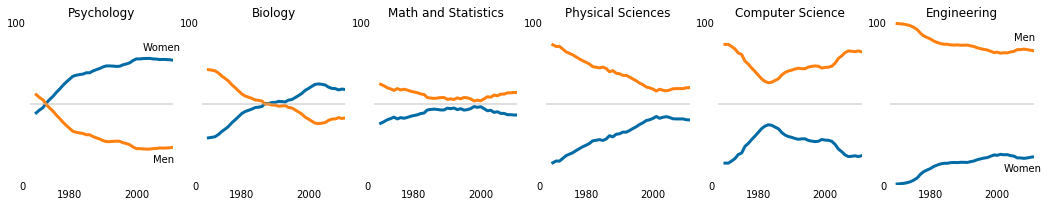

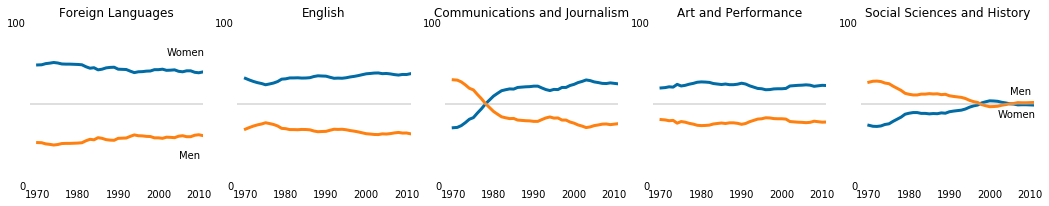

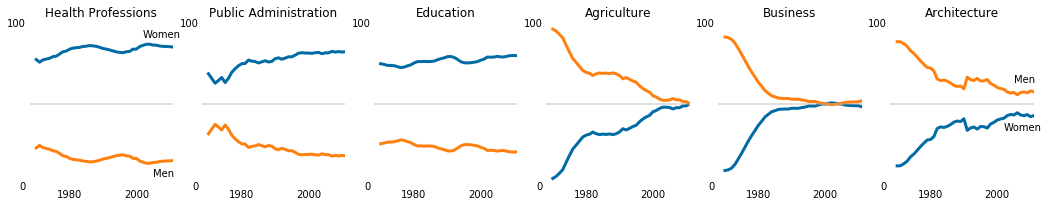

In [6]:
for key, major_category in college_major_categories.items():
    gender_multi_plots(gender_gaps, major_category, key)